# Kaggle Competition: House Prices: Advanced Regression Techniques
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
## Part 1: Exploratory Data Analysis
### Outline:
1. Preparation
    * 1.1 Importing Libraries
    * 1.2 Importing Data
    * 1.3 Understanding the dataset
    * 1.4 Definition of Analysis Functions
2. Numerical Analysis
    * 2.1 Dependant Variable
    * 2.2 Feature viszualisations
    * 2.3 Feature distributions
3. Categorical Variables
    * 3.1 Feature visualizations
4. Data Wrangling
    * 4.1 Excessive Multicollinearity
    * 4.2 Imputation of missing values

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, Normalizer
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.stats import skew, kurtosis, shapiro

In [2]:
# Importing Data

train_df = pd.read_csv('train.csv', index_col='Id')

In [3]:
### Understanding the Dataset

train_df.shape

(1460, 80)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-

In [5]:
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


The given dataset consists of cross-sectional data with 80 features (excluding the id) and 1460 observations. The problem at hand is a numerical regression problem.

Null-entries are present in the data set and will be examined. Features with less than 25% missing values will be imputed if possible and necessary.

This analysis will start out with the 37 numerical features and will then examine the 43 categorical features.

In [6]:
# Definition of analysis function
def num_analysis(subject,droplist=None,target='SalePrice',data=train_df,correlation_ranks=5,drop_add=False,reg_order=1):
    # Calculation of basic statistics
    print(data[subject].describe())
    print('Skewness: {}'.format(data[subject].skew()))
    print('Kurtosis: {}'.format(data[subject].kurt()))
    
    # Calculation of correlation with target and to other features
    if subject!= target:
        target_corr = data.loc[:,[subject,target]].corr().loc[subject][1]
        print('Correlation to target: '.format(target_corr))
        print(target_corr)
    corr_ranks = data.corr().loc[subject].transform(lambda x:abs(x)).sort_values(ascending=False).head(correlation_ranks+1)[1:]
    print('Top correlations:\n{}'.format(corr_ranks))
    
    fig,ax = plt.subplots(figsize=(10,5))
    
    # Show distribution and relation to target
    plt.subplot(1,2,1)
    sns.distplot(data[subject].dropna(),hist=True).set_title('p-value: {}'.format(shapiro(data[subject].dropna())))
    plt.subplot(1,2,2)
    sns.regplot(x=subject,y=target,data=data,order=reg_order)
    
    # Calculate amount of missing data
    missing_abs = data.loc[:,subject].isnull().sum()
    missing_rel = data.loc[:,subject].isnull().mean()
    print('Amount of missing data: {} ({}%)'.format(missing_abs,missing_rel*100))
    
    # Add feature to droplist if drop_add == True
    if drop_add and (subject not in droplist):
        droplist.append[subject]
    
    plt.tight_layout()
    # plt.show()
    
    return droplist

In [7]:
def cat_analysis(subject,droplist=None,target='SalePrice',data=train_df,drop_add=False):
    
    # Amount of missing data
    print('Amount of missing data: {} ({}%)'.format(data.loc[:,subject].isnull().sum(),data.loc[:,subject].isnull().mean()*100))
    
    # Visualization
    sns.boxplot(x=subject,y=target,data=data)
    
    # Appending to droplist
    if drop_add and (subject not in droplist):
        droplist.append(subject)
        
    return droplist

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64
Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529
Top correlations:
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
TotalBsmtSF    0.613581
Name: SalePrice, dtype: float64
Amount of missing data: 0 (0.0%)


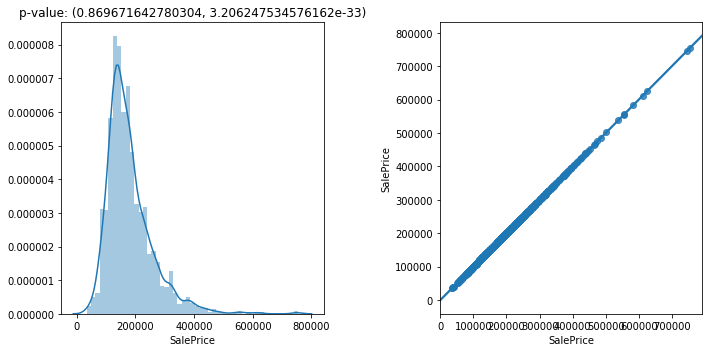

In [8]:
# The dependant variable
num_analysis('SalePrice')

There appear to be a few highly linearly correlated features in the dataset, suggesting, that there will be some success wit linear methods.
The dependant variable is not normally distributed, but the density plot suggests, that that may be alleviated, by logarithmization them.

p-value: 1.1490678986092462e-07


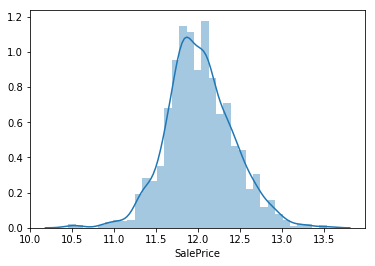

In [9]:
sns.distplot(train_df['SalePrice'].transform(lambda x: np.log(x)))
print('p-value: {}'.format(shapiro(train_df['SalePrice'].transform(lambda x: np.log(x)))[1]))
# Indeed, the distribution seems closer to the normal distribution now. However, the Shapiro-Wilk test still rejects normality.
train_df['SalePrice_log'] = train_df['SalePrice'].transform(lambda x: np.log(x))
train_df = train_df.drop('SalePrice',axis=1)

In [10]:
# DONE: Create a function that returns the p-value of linear correlation
def h1_correlation(df,target,subject,permutations=1*10**4):
    testing_df = df.loc[:,[target,subject]].dropna()
    target_array = np.array(testing_df[target].dropna())
    subject_array = np.array(testing_df[subject].dropna())
    
    base_correlation = np.corrcoef(target_array,subject_array)[0,1]
    test_correlations = []
    
    for i in range(permutations):
        target_test = np.random.permutation(target_array)
        subject_test = np.random.permutation(subject_array)
        
        test_correlation = np.corrcoef(target_test,subject_test)[0,1]
        test_correlations.append(test_correlation)
        
    p_value = np.mean(np.array(([abs(value)>abs(base_correlation) for value in test_correlations])))
    
    return base_correlation, p_value

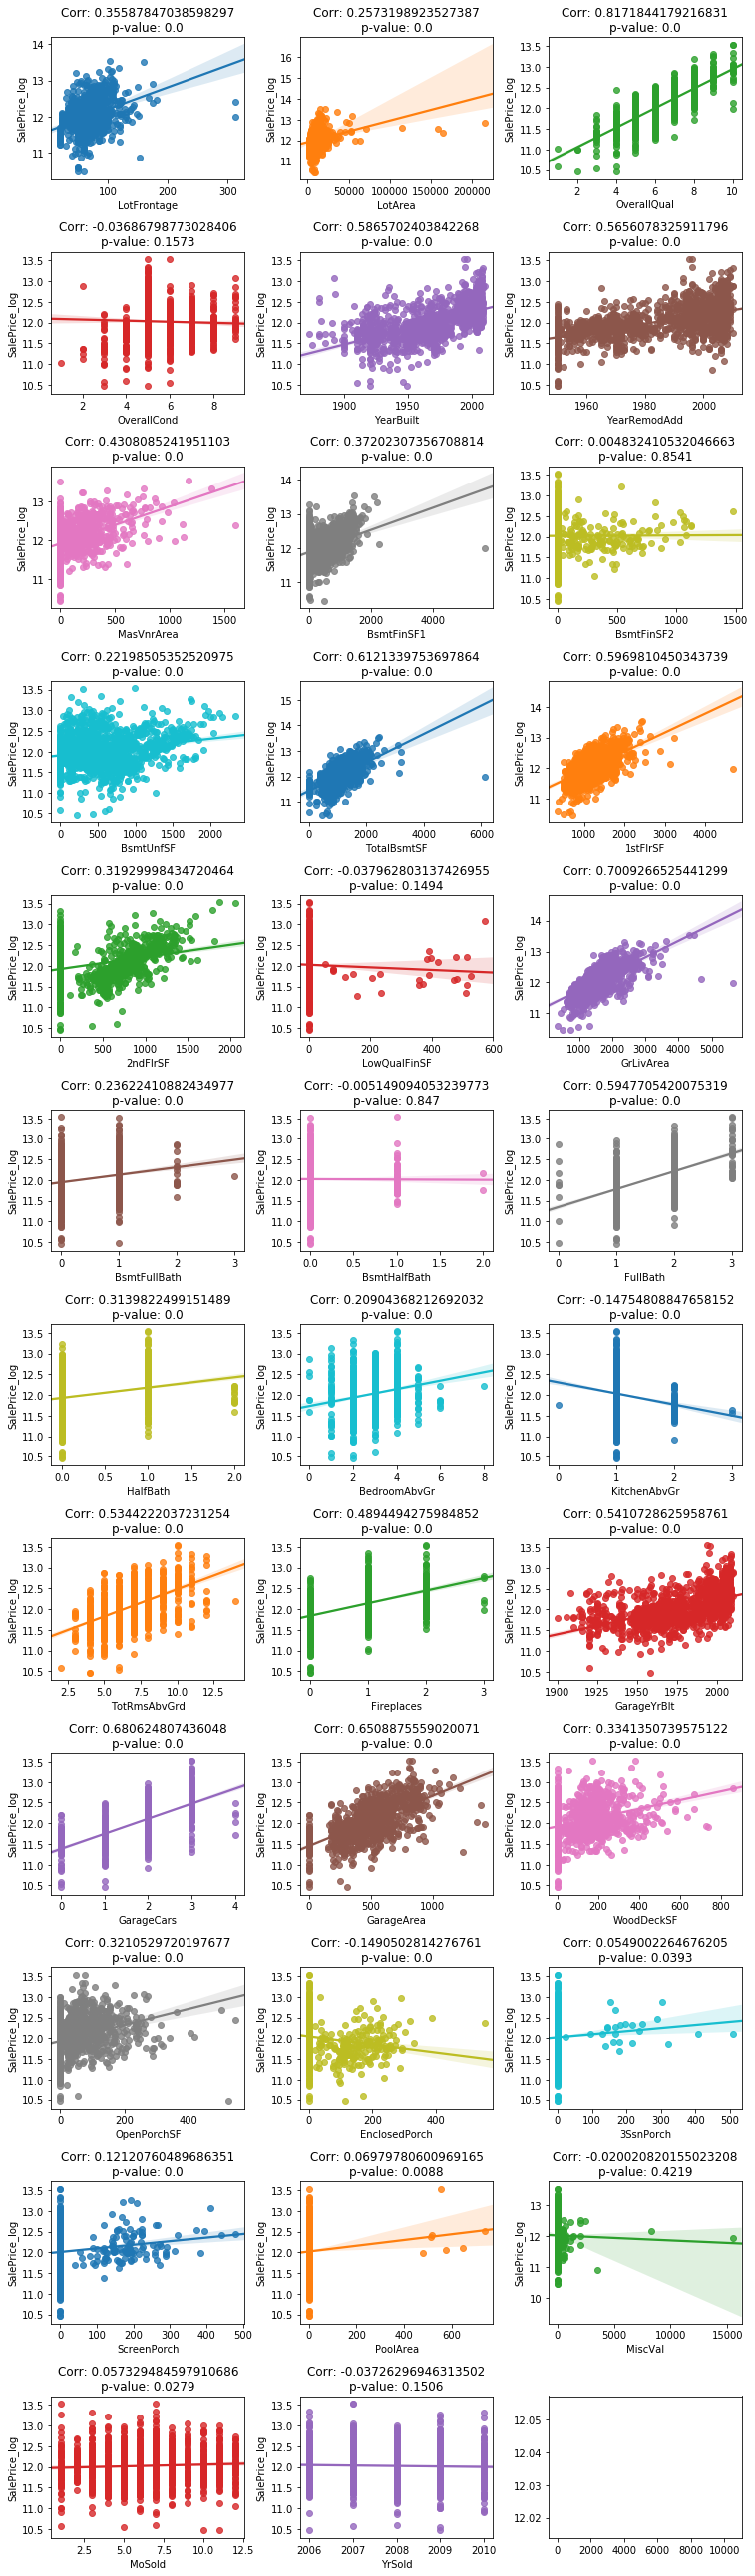

In [11]:
# DONE: Include p-values of linear correlation and correlation in the below graphs
n_cols = 3
n_rows = 12
num_features = [feature for feature in train_df if train_df[feature].dtype != 'object' and feature != 'SalePrice_log']
i = 0

fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3))

for row in range(n_rows):
    for col in range(n_cols):
        if i+1 < len(num_features):
            i += 1
            corr, p_value = h1_correlation(train_df,'SalePrice_log',num_features[i])
            sns.regplot(x=num_features[i],y='SalePrice_log',data=train_df,ax = ax[row][col]).set_title('Corr: {}\np-value: {}'.format(corr,p_value))
            
plt.tight_layout()
plt.show()

It appears, that all relationships between features are either linear or quadratic at most. Several features appear to have a strong impact on Sales Prices (like OverallQual). However, for many other feature, the hypothesis of non-correlation can not be discared, and there is no visual indicator for a non-linear correlation (e.g. PoolArea).

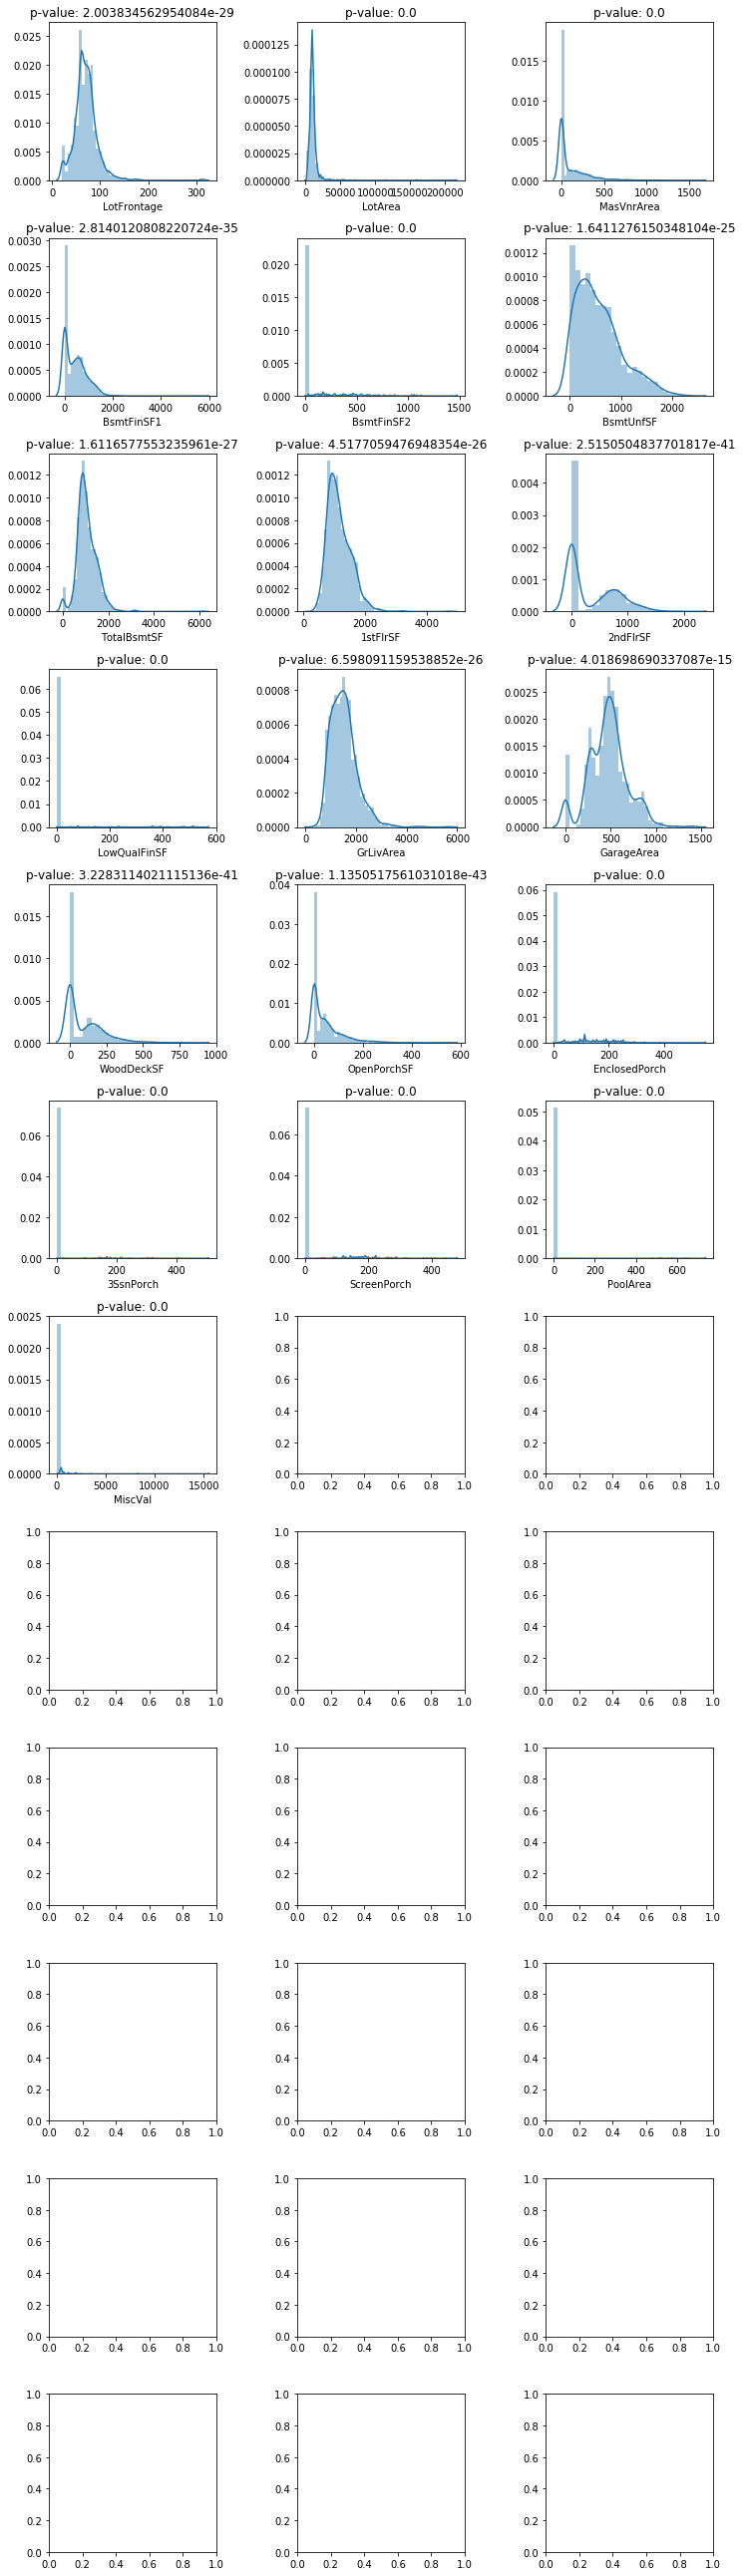

In [15]:
# Examining the distribution of numerical features
fig, ax = plt.subplots(n_rows,n_cols,figsize=(n_cols*3.5,n_rows*3))
i=0

for row in range(n_rows):
    for col in range(n_cols):
        if i+1 < len(num_features):
            i+=1
            sns.distplot(train_df[num_features[i]].dropna(),ax = ax [row][col]).set_title('p-value: {}'.format(shapiro(train_df[num_features[i]].dropna())[1]))
            
plt.tight_layout()
plt.show()

As most of the features are generally not normal, the normalization transformation of sklearn will be needed before machine learning algorithms can be applied. The largely differing scales of the feature also calls for the use of the StandardScaler transformation.

In [13]:
# TODO: Change datatypes of discrete numerical variables to object
to_be_changed = ['YrSold','MoSold','GarageYrBlt','YearBuilt','YearRemodAdd','OverallQual','GarageCars',
                 'TotRmsAbvGrd','HalfBath','Fireplaces','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath',
                 'BedroomAbvGr','KitchenAbvGr']

for feature in to_be_changed:
    train_df[feature] = train_df[feature].astype('object')

In [ ]:
# TODO: Get distribution of the remaining numerical valriables as close to a normal distribution as possible; print out the p-values again

In [ ]:
# Examination of multicollinearity
sns.heatmap(train_df.corr(),cmap='Blues_r')
# There appear to be some highly correlated features in the dataset

Features with excessive multicollinearity have been identified. The feature with a lower correlation to the target feature was dropped from the dataset.

In [ ]:
# Examination of categorical features

cat_features = [obj for obj in train_df if train_df[obj].dtype == 'object']

rows = 14
cols = 3

fig, ax = plt.subplots(rows,cols,figsize=(cols*3.5,rows*3))
i = 0

for row in range(rows):
    for col in range(cols):
        if i+1<len(cat_features):
            i+=1
            sns.boxplot(x=cat_features[i],y='SalePrice_log',data = train_df,ax = ax [row][col])
            
plt.tight_layout()
plt.show()

In [ ]:
## Data Wrangling
# Excessive multicollinearity

droplist_candidates = []

for subject_col in train_df:
    if train_df[subject_col].dtypes != 'object':
        for test_col in train_df:
            if (test_col != subject_col) and (test_col != 'SalePrice_log') and (subject_col != 'SalePrice_log') and (train_df[test_col].dtypes != 'object'):
                test_corr = train_df.loc[:,[subject_col,test_col]].corr().iloc[0,1]
                if abs(test_corr) > 0.6 and (subject_col not in droplist_candidates):
                    droplist_candidates.append(subject_col)
else:
    droplist_candidates.append('SalePrice_log')

In [ ]:
new_corrmat = train_df.loc[:,droplist_candidates].corr().nlargest(99,'SalePrice_log')

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(new_corrmat,annot=True)

Features will be dropped, if they display a correlation to other features, which exceeds 0.6. The feature with the smaller correlation to the target variable will be dropped.

In [ ]:
droplist = ['GarageCars','GarageYrBlt','BsmtFullBath','1stFlrSF','2ndFlrSF','FullBath','BedroomAbvGr','TotRmsAbvGrd','FullBath']
train_df = train_df.drop(droplist,axis=1)

In [ ]:
# Imputation of missing values - find features for which values are missing
missing_report = pd.DataFrame(train_df.isnull().mean(),columns=['Share of missing']).nlargest(99,'Share of missing')

droplist = []
for index,row in missing_report.iterrows():
    if row.any() == 0:
        droplist.append(index)
        
missing_report.drop(droplist,axis=0,inplace=True)
missing_report

In [ ]:
# Drop features for which more than 25% of features are missing
droplist = list(missing_report.loc[missing_report['Share of missing'] > 0.25].index)
train_df = train_df.drop(droplist,axis=1)
missing_report = missing_report.drop(droplist,axis=0)

In [ ]:
# Categorical Features with missing values will be dropped
droplist = []
for index,row in missing_report.iterrows():
    if train_df[index].dtypes=='object' and row.any() > 0:
        droplist.append(index)
        
train_df = train_df.drop(droplist,axis=1)
missing_report = missing_report.drop(droplist,axis=0)

In [ ]:
corr_to_target = []

for index,value in missing_report.iterrows():
    corr = train_df.loc[:,[index,'SalePrice_log']].corr().iloc[0,1]
    corr_to_target.append(corr)

missing_report['Corr_to_target'] = corr_to_target

The remaining two features are sufficiently correlated to the target to justify imputation through linear regression. Therefore, the best regressor hast to be found. For now, the feature with the highest correlation to the feature in question shall be sufficient.

In [ ]:
def find_max_corr_feature(subject,dataframe,exceptions=[]):
    corrs = {}
    max_corr = 0
    max_corr_feat = None
    for col in dataframe:
        if (dataframe[col].dtype!='object') and (col not in exceptions) and (col != subject):
            corr = dataframe.loc[:,[subject,col]].corr().iloc[0,1]
            corrs[col] = corr
    
    for key,value in corrs.items():
        if value > max_corr:
            max_corr = value
            max_corr_feat = key
            
    return max_corr_feat
        

In [ ]:
best_regressor = []

for index, row in missing_report.iterrows():
    best_regressor.append(find_max_corr_feature(index,train_df,['SalePrice_log']))
    
missing_report['best_regressor'] = best_regressor

In [ ]:
def impute_by_feature(target,feature,dataframe):
    X_train = np.array(dataframe.loc[dataframe[target].notnull(),feature]).reshape(-1,1)
    y_train = np.array(dataframe.loc[dataframe[target].notnull(),target])
    X_impute = np.array(dataframe.loc[:,feature]).reshape(-1,1)
    
    regressor = LinearRegression()
    regressor.fit(X_train,y_train)
    y_hat = regressor.predict(X_train)
    r2 = r2_score(y_train,y_hat)
    predictions = regressor.predict(X_impute)
    
    return predictions, r2

In [ ]:
missing_report

In [ ]:
preds, r2 = impute_by_feature('LotFrontage','LotArea',train_df)
print(r2)
preds, r2 = impute_by_feature('MasVnrArea','OverallQual',train_df)
print(r2)
# As the single feature imputation does not perform very well, the feature LotFrontage will be dropped entirely, and MasVnrArea will be kept,
# but the rows with missing values will be dropped.

In [ ]:
train_df
train_df.drop('LotFrontage',axis=1,inplace=True)
train_df.drop(train_df.loc[train_df['MasVnrArea'].isnull()].index,axis=0,inplace=True)

To end this notebook, a short recap will be conducted, which aims to confirm, that there are no missing values left, and that there is no more excessive collinearity.

In [ ]:
# Check for excessive multicollinearity
fig, ax = plt.subplots(figsize=(20,20))
corrmat = train_df.corr()
corrmat
sns.heatmap(corrmat,annot = True)

## There is no multicollinearity above the threshold of 0.6

In [ ]:
# Check for missing values
print(train_df.isnull().sum().sum())
# There are no more missing values in the dataset.

In [ ]:
# As train_df has been processed, it can be saved to csv
train_df.to_csv('train_processed.csv')

This notebook is finished for now, but following are some ideas on what else could be done with the data:
- During the examination of the numerical features, the p-values should be more pronounced than the correlation. Accordingly, one could drop the features for which the hypothesis of non-correlation can not be dismissed.
- There are some numerical features in the dataset, which could actually be converted to categorical features. Especially OveralQual and MoSold are examples.
- One could try to shift the distribution of numerical features more towards the normal distribution. Also, one could conduct Chi test for each numerical feature (especially the target feature).
- More complex imputation methods could be employed to impute missing values.

In [ ]:
# TODO: Apply data wrangling to test.csv and compile prediction ready dataset